# Context-Based prediction of premature birth using python machine learning and explainable artificial intelligence (XAI)

In [1]:
pip install openpyxl


  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import warnings
import numpy as np
import random
import os
import pickle
import shap
shap.initjs()
from numpy.random import seed
seed(42) 
warnings.filterwarnings('ignore')
import shap
# random_seed = None
# np.random.seed(12)
# random.seed(12)
# random.seed(random_seed)
# os.environ['PYTHONHASHSEED'] = str(random_seed)
#Load the dataset
df = pd.read_excel('../data/Database.xlsx')
df

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


,record_id,case_control,maternity,GA,mother's_age,weight_baby_class,resident_by_domicile,water_piped,color_race,color_race/group,...,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income_BRL,householde_income,weight_gain _pregnancy,birth_date,weight_baby,apgar1,apgar5
0,1,1,1,36,38,4,1,1,2,1,...,2,2.0,1,313.0,99.968061,5.2,2016-10-02,2505,9.0,9.0
1,2,2,1,39,20,4,1,2,1,1,...,2,2.0,2,1030.0,328.968381,18.0,2016-10-02,3360,7.0,8.0
2,3,2,1,38,15,4,1,2,1,1,...,2,2.0,1,150.0,47.908017,4.0,2016-10-02,2920,8.0,9.0
3,4,1,1,32,24,3,1,2,1,1,...,2,2.0,1,880.0,281.060364,18.0,2016-10-03,1510,6.0,8.0
4,5,2,1,39,18,4,1,1,1,1,...,2,2.0,1,1980.0,632.385819,15.0,2016-10-04,2980,8.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,801,2,2,39,28,4,2,2,1,1,...,2,2.0,1,1437.0,458.958799,17.0,2017-08-16,3626,8.0,9.0
775,802,2,2,39,21,4,1,2,1,1,...,2,2.0,2,937.0,299.265410,17.0,2017-08-19,3475,8.0,9.0
776,803,2,2,39,24,4,2,2,1,1,...,2,4.0,2,880.0,281.060364,15.0,2017-08-18,4450,8.0,9.0
777,804,2,2,40,21,4,2,2,1,1,...,2,4.0,2,0.0,0.000000,7.0,2017-08-21,3870,8.0,9.0


In [3]:
np.random.randn()

0.4967141530112327

# Data Preprocessing

Removing all features that are unnecessary or might not be available for prediction such as id, factors after birth, reasons for prematurity,

In [4]:
df = df.drop(columns = ['record_id', 'birth_date', 'householde_income_BRL', 'delivery', 'GA', 'causes_of_premature_birth', 'weight_baby', 'weight_baby_class','apgar5', 'apgar1'])
df

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,...,baby_sex,type_gestation,congenital_anomalies,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income,weight_gain _pregnancy
0,1,1,38,1,1,2,1,3,1.0,3,...,2,2,2,2,2,2,2.0,1,99.968061,5.2
1,2,1,20,1,2,1,1,2,1.0,2,...,2,2,2,2,2,2,2.0,2,328.968381,18.0
2,2,1,15,1,2,1,1,3,1.0,3,...,2,2,2,2,2,2,2.0,1,47.908017,4.0
3,1,1,24,1,2,1,1,3,1.0,3,...,1,2,2,2,2,2,2.0,1,281.060364,18.0
4,2,1,18,1,1,1,1,2,1.0,3,...,1,2,2,2,2,2,2.0,1,632.385819,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2,2,28,2,2,1,1,1,1.0,2,...,1,2,2,2,2,2,2.0,1,458.958799,17.0
775,2,2,21,1,2,1,1,2,1.0,2,...,1,2,2,2,2,2,2.0,2,299.265410,17.0
776,2,2,24,2,2,1,1,2,1.0,3,...,1,2,2,2,2,2,4.0,2,281.060364,15.0
777,2,2,21,2,2,1,1,3,1.0,4,...,1,2,2,2,2,2,4.0,2,0.000000,7.0


also drop features that maybe currently unavailable and features that definetely do not affect prediction

In [5]:
df = df.drop(columns = ['baby_sex', 'type_gestation', 'city'])
df

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,...,hospitalization,syphilis,congenital_anomalies,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income,weight_gain _pregnancy
0,1,1,38,1,1,2,1,3,1.0,3,...,2,2,2,2,2,2,2.0,1,99.968061,5.2
1,2,1,20,1,2,1,1,2,1.0,2,...,1,2,2,2,2,2,2.0,2,328.968381,18.0
2,2,1,15,1,2,1,1,3,1.0,3,...,1,2,2,2,2,2,2.0,1,47.908017,4.0
3,1,1,24,1,2,1,1,3,1.0,3,...,1,2,2,2,2,2,2.0,1,281.060364,18.0
4,2,1,18,1,1,1,1,2,1.0,3,...,2,2,2,2,2,2,2.0,1,632.385819,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2,2,28,2,2,1,1,1,1.0,2,...,2,2,2,2,2,2,2.0,1,458.958799,17.0
775,2,2,21,1,2,1,1,2,1.0,2,...,2,2,2,2,2,2,2.0,2,299.265410,17.0
776,2,2,24,2,2,1,1,2,1.0,3,...,1,2,2,2,2,2,4.0,2,281.060364,15.0
777,2,2,21,2,2,1,1,3,1.0,4,...,2,2,2,2,2,2,4.0,2,0.000000,7.0


Get Basic description of numerical data features using .describe() and .info()

In [6]:
df.describe()

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,...,hospitalization,syphilis,congenital_anomalies,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income,weight_gain _pregnancy
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,733.000000,779.000000,...,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,777.000000,779.000000,779.000000,703.000000
mean,1.508344,1.112965,24.893453,1.587933,1.713736,1.436457,1.147625,2.105263,1.110505,2.667522,...,1.770218,1.966624,1.974326,1.957638,1.983312,1.991014,2.010296,1.664955,544.860927,10.962304
std,0.500252,0.316754,6.709368,0.492523,0.452305,0.883732,0.354956,0.626502,0.313732,0.634169,...,0.420963,0.179732,0.158262,0.201543,0.128182,0.094428,0.591954,0.472309,767.773610,5.939598
min,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,19.500000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,281.060364,7.000000
50%,2.000000,1.000000,24.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,319.386777,10.000000
75%,2.000000,1.000000,30.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,638.773555,14.000000
max,2.000000,2.000000,50.000000,2.000000,2.000000,5.000000,2.000000,3.000000,2.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,14372.404982,32.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   case_control                  779 non-null    int64  
 1   maternity                     779 non-null    int64  
 2   mother's_age                  779 non-null    int64  
 3   resident_by_domicile          779 non-null    int64  
 4   water_piped                   779 non-null    int64  
 5   color_race                    779 non-null    int64  
 6   color_race/group              779 non-null    int64  
 7   Maternal_education            779 non-null    int64  
 8   person_sustain_ education     733 non-null    float64
 9   maternal_occupation           779 non-null    int64  
 10  job                           777 non-null    float64
 11  person_sustain_who            779 non-null    int64  
 12  age_range_person_sustain      763 non-null    float64
 13  famil

In [8]:
df.shape

(779, 64)

Dataset has a lot of null values. Dropping null values creates a loss of data. So we further preprocess instead of dropping.

In [9]:
check_df = df.dropna()
check_df.shape

(364, 64)

In [10]:
df.shape

(779, 64)

Number of prematures in our study. Case = PREMATURE & Control = NORMAL

In [11]:
df['case_control'].value_counts()
#The dataset is balanced

case_control
2    396
1    383
Name: count, dtype: int64

shows missing in weight_gain_class is because of weight_gain_pregnancy

In [12]:
df[['weight_gain_class', 'weight_gain _pregnancy']].head(30)

,weight_gain_class,weight_gain _pregnancy
0,1.0,5.2
1,3.0,18.0
2,2.0,4.0
3,3.0,18.0
4,1.0,15.0
5,2.0,7.0
6,3.0,20.0
7,NaN,NaN
8,1.0,16.0
9,2.0,6.0


I decided that caesarean_previous null for women without a child seeing premature_child_previous when equal to "had no previous child (denoted by 2)" is equal to "Nan" in Caesarean_previous

In [13]:
df[['premature_child_previous', 'child_underweight_previous', 'caesarean_previous']].head()

,premature_child_previous,child_underweight_previous,caesarean_previous
0,2,2,2.0
1,2,2,NaN
2,2,2,NaN
3,2,2,1.0
4,2,2,NaN


As a result filled "Caesarean_Previous" with zero

In [14]:
df['caesarean_previous'].fillna(0, inplace = True) 

In [15]:
df

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,person_sustain_ education,maternal_occupation,...,hospitalization,syphilis,congenital_anomalies,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income,weight_gain _pregnancy
0,1,1,38,1,1,2,1,3,1.0,3,...,2,2,2,2,2,2,2.0,1,99.968061,5.2
1,2,1,20,1,2,1,1,2,1.0,2,...,1,2,2,2,2,2,2.0,2,328.968381,18.0
2,2,1,15,1,2,1,1,3,1.0,3,...,1,2,2,2,2,2,2.0,1,47.908017,4.0
3,1,1,24,1,2,1,1,3,1.0,3,...,1,2,2,2,2,2,2.0,1,281.060364,18.0
4,2,1,18,1,1,1,1,2,1.0,3,...,2,2,2,2,2,2,2.0,1,632.385819,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2,2,28,2,2,1,1,1,1.0,2,...,2,2,2,2,2,2,2.0,1,458.958799,17.0
775,2,2,21,1,2,1,1,2,1.0,2,...,2,2,2,2,2,2,2.0,2,299.265410,17.0
776,2,2,24,2,2,1,1,2,1.0,3,...,1,2,2,2,2,2,4.0,2,281.060364,15.0
777,2,2,21,2,2,1,1,3,1.0,4,...,2,2,2,2,2,2,4.0,2,0.000000,7.0


Here we replace missing household income and BMI with the mean of total columns

In [16]:
import numpy as np

df['householde_income '] = np.where(df['householde_income ']==0,df['householde_income '].mean(),df['householde_income '])
df['BMI_classif'] = np.where(df['BMI_classif']== None,df['BMI_classif'].mean(),df['BMI_classif'])

In [17]:
#drop other columns with missing data
df = df.drop(columns = ['person_sustain_ education', 'weight_gain_class', 'weight_gain _pregnancy'])

In [18]:
df.shape

(779, 61)

In [19]:
df.dropna(inplace = True)

In [20]:
df.drop_duplicates(inplace = True)
df

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,maternal_occupation,job,...,hypertension,hospitalization,syphilis,congenital_anomalies,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income
0,1,1,38,1,1,2,1,3,3,2.0,...,3,2,2,2,2,2,2,2.0,1,99.968061
1,2,1,20,1,2,1,1,2,2,2.0,...,1,1,2,2,2,2,2,2.0,2,328.968381
2,2,1,15,1,2,1,1,3,3,2.0,...,1,1,2,2,2,2,2,2.0,1,47.908017
3,1,1,24,1,2,1,1,3,3,2.0,...,2,1,2,2,2,2,2,2.0,1,281.060364
5,2,1,21,2,2,1,1,2,3,1.0,...,1,2,2,2,2,2,2,1.0,2,281.060364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2,2,28,2,2,1,1,1,2,2.0,...,1,2,2,2,2,2,2,2.0,1,458.958799
775,2,2,21,1,2,1,1,2,2,1.0,...,1,2,2,2,2,2,2,2.0,2,299.265410
776,2,2,24,2,2,1,1,2,3,3.0,...,2,1,2,2,2,2,2,4.0,2,281.060364
777,2,2,21,2,2,1,1,3,4,3.0,...,1,2,2,2,2,2,2,4.0,2,544.860927


In [21]:
df.shape

(696, 61)

# Feature Selection

Application of Variance Threshold. No Features were removed finally.

In [22]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest


var_thresh = VarianceThreshold() 
var_thresh.fit(df)

VarianceThreshold()

In [23]:
var_thresh.get_support()
#Columns Do not vary so variance threshold is able to remove no columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

# Model Call

In [24]:
def correlation(dataset, threshold):
    '''
    Takes parameter:  dataset as dataframe and threshold as integer
    and calculates correlation.
    Removes one feature between a pair of feature having a correlation
    greater than the threshold
    '''
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
df = df.reset_index()

In [26]:
df.drop(columns = ['index'], inplace = True)
df

,case_control,maternity,mother's_age,resident_by_domicile,water_piped,color_race,color_race/group,Maternal_education,maternal_occupation,job,...,hypertension,hospitalization,syphilis,congenital_anomalies,mothers_born_preterm,psychoactive_drugs,abortion_attempt,occupation_person_sustain,place_of_residence,householde_income
0,1,1,38,1,1,2,1,3,3,2.0,...,3,2,2,2,2,2,2,2.0,1,99.968061
1,2,1,20,1,2,1,1,2,2,2.0,...,1,1,2,2,2,2,2,2.0,2,328.968381
2,2,1,15,1,2,1,1,3,3,2.0,...,1,1,2,2,2,2,2,2.0,1,47.908017
3,1,1,24,1,2,1,1,3,3,2.0,...,2,1,2,2,2,2,2,2.0,1,281.060364
4,2,1,21,2,2,1,1,2,3,1.0,...,1,2,2,2,2,2,2,1.0,2,281.060364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2,2,28,2,2,1,1,1,2,2.0,...,1,2,2,2,2,2,2,2.0,1,458.958799
692,2,2,21,1,2,1,1,2,2,1.0,...,1,2,2,2,2,2,2,2.0,2,299.265410
693,2,2,24,2,2,1,1,2,3,3.0,...,2,1,2,2,2,2,2,4.0,2,281.060364
694,2,2,21,2,2,1,1,3,4,3.0,...,1,2,2,2,2,2,2,4.0,2,544.860927


Seperate input and outputs

In [27]:
X = df.drop(columns =['case_control'])
y = df['case_control']

Make imports

In [28]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [29]:
def metrics(y_test, y_pred, y_train_pred, y_train):
    '''
    Takes parameters: y_test(Test labels),y_pred(test pred), 
                      y_train_pred(Test predictions), y_train(Train predictions) --> integer
    as input and gives the output after calculation:
    test accuracy (s), precision, recall, f1 score (f), train accuracy (train)
    '''
    s = accuracy_score(y_pred, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    train  = accuracy_score(y_train, y_train_pred)

    return s, precision, recall, f, train

In [30]:
def print_statement(scores, precision, recall, f1, dttra):
    '''
    takes parameters: scores, precision, recall, f1, dttra -->list
    and prints the average and standard deviation of the list
    '''
    print ("Train Accuracy = ", np.mean(dttra)*100, "+/-", np.std(dttra)*100)
    print ("Test Accuracy = ", np.mean(scores)*100, "+/-", np.std(scores)*100)
    print ("Precision = ", np.mean(precision), "+/-", np.std(precision))
    print ("Recall = ", np.mean(recall), "+/-", np.std(recall))
    print ("F1 = ", np.mean(f1), "+/-", np.std(f1))

# Tuning Search Space

Search Space for all the models use. Decision Tree, Random Forest, XGBoost, SVM

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

max_depth = [int(x) for x in np.linspace(start = 1, stop = 5, num = 1)]
random_grid_dt = {'max_depth': [2, 3],     'random_state':[999],
}

n_neigh = [int(x) for x in np.linspace(start = 1, stop = 5, num = 1)]
random_grid_knn = {'n_neigbours': n_neigh}

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(2, 15,1)]

random_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
                      'random_state':[999],

               }
random_grid_s = {'C': [1,5,10],
               'kernel': [ 'rbf'],
                      'random_state':[999],

               }

XGboost_params = {
    'learning_rate': [0.01, 0.001],
    'n_estimators': [int(i) for i in range(10,150,20)],
    'max_depth': [int(i) for i in range(2,15,1)],
    'min_child_weight': [int(i) for i in range(1,6,1)],
    'random_state':[999],
    'nthread':[-1],
   
}

In [32]:
def print_fold(scores):
    '''
    takes parameter: scores --> list
    prints all the values inside this list as a % of 100
    '''
    j = 0
    for i in scores:
        print("Fold ",j,": ",i*100)
        j+=1

# Cross Validation, Pearson's Correlation, Mutual Information and Model Training

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 2 candidates

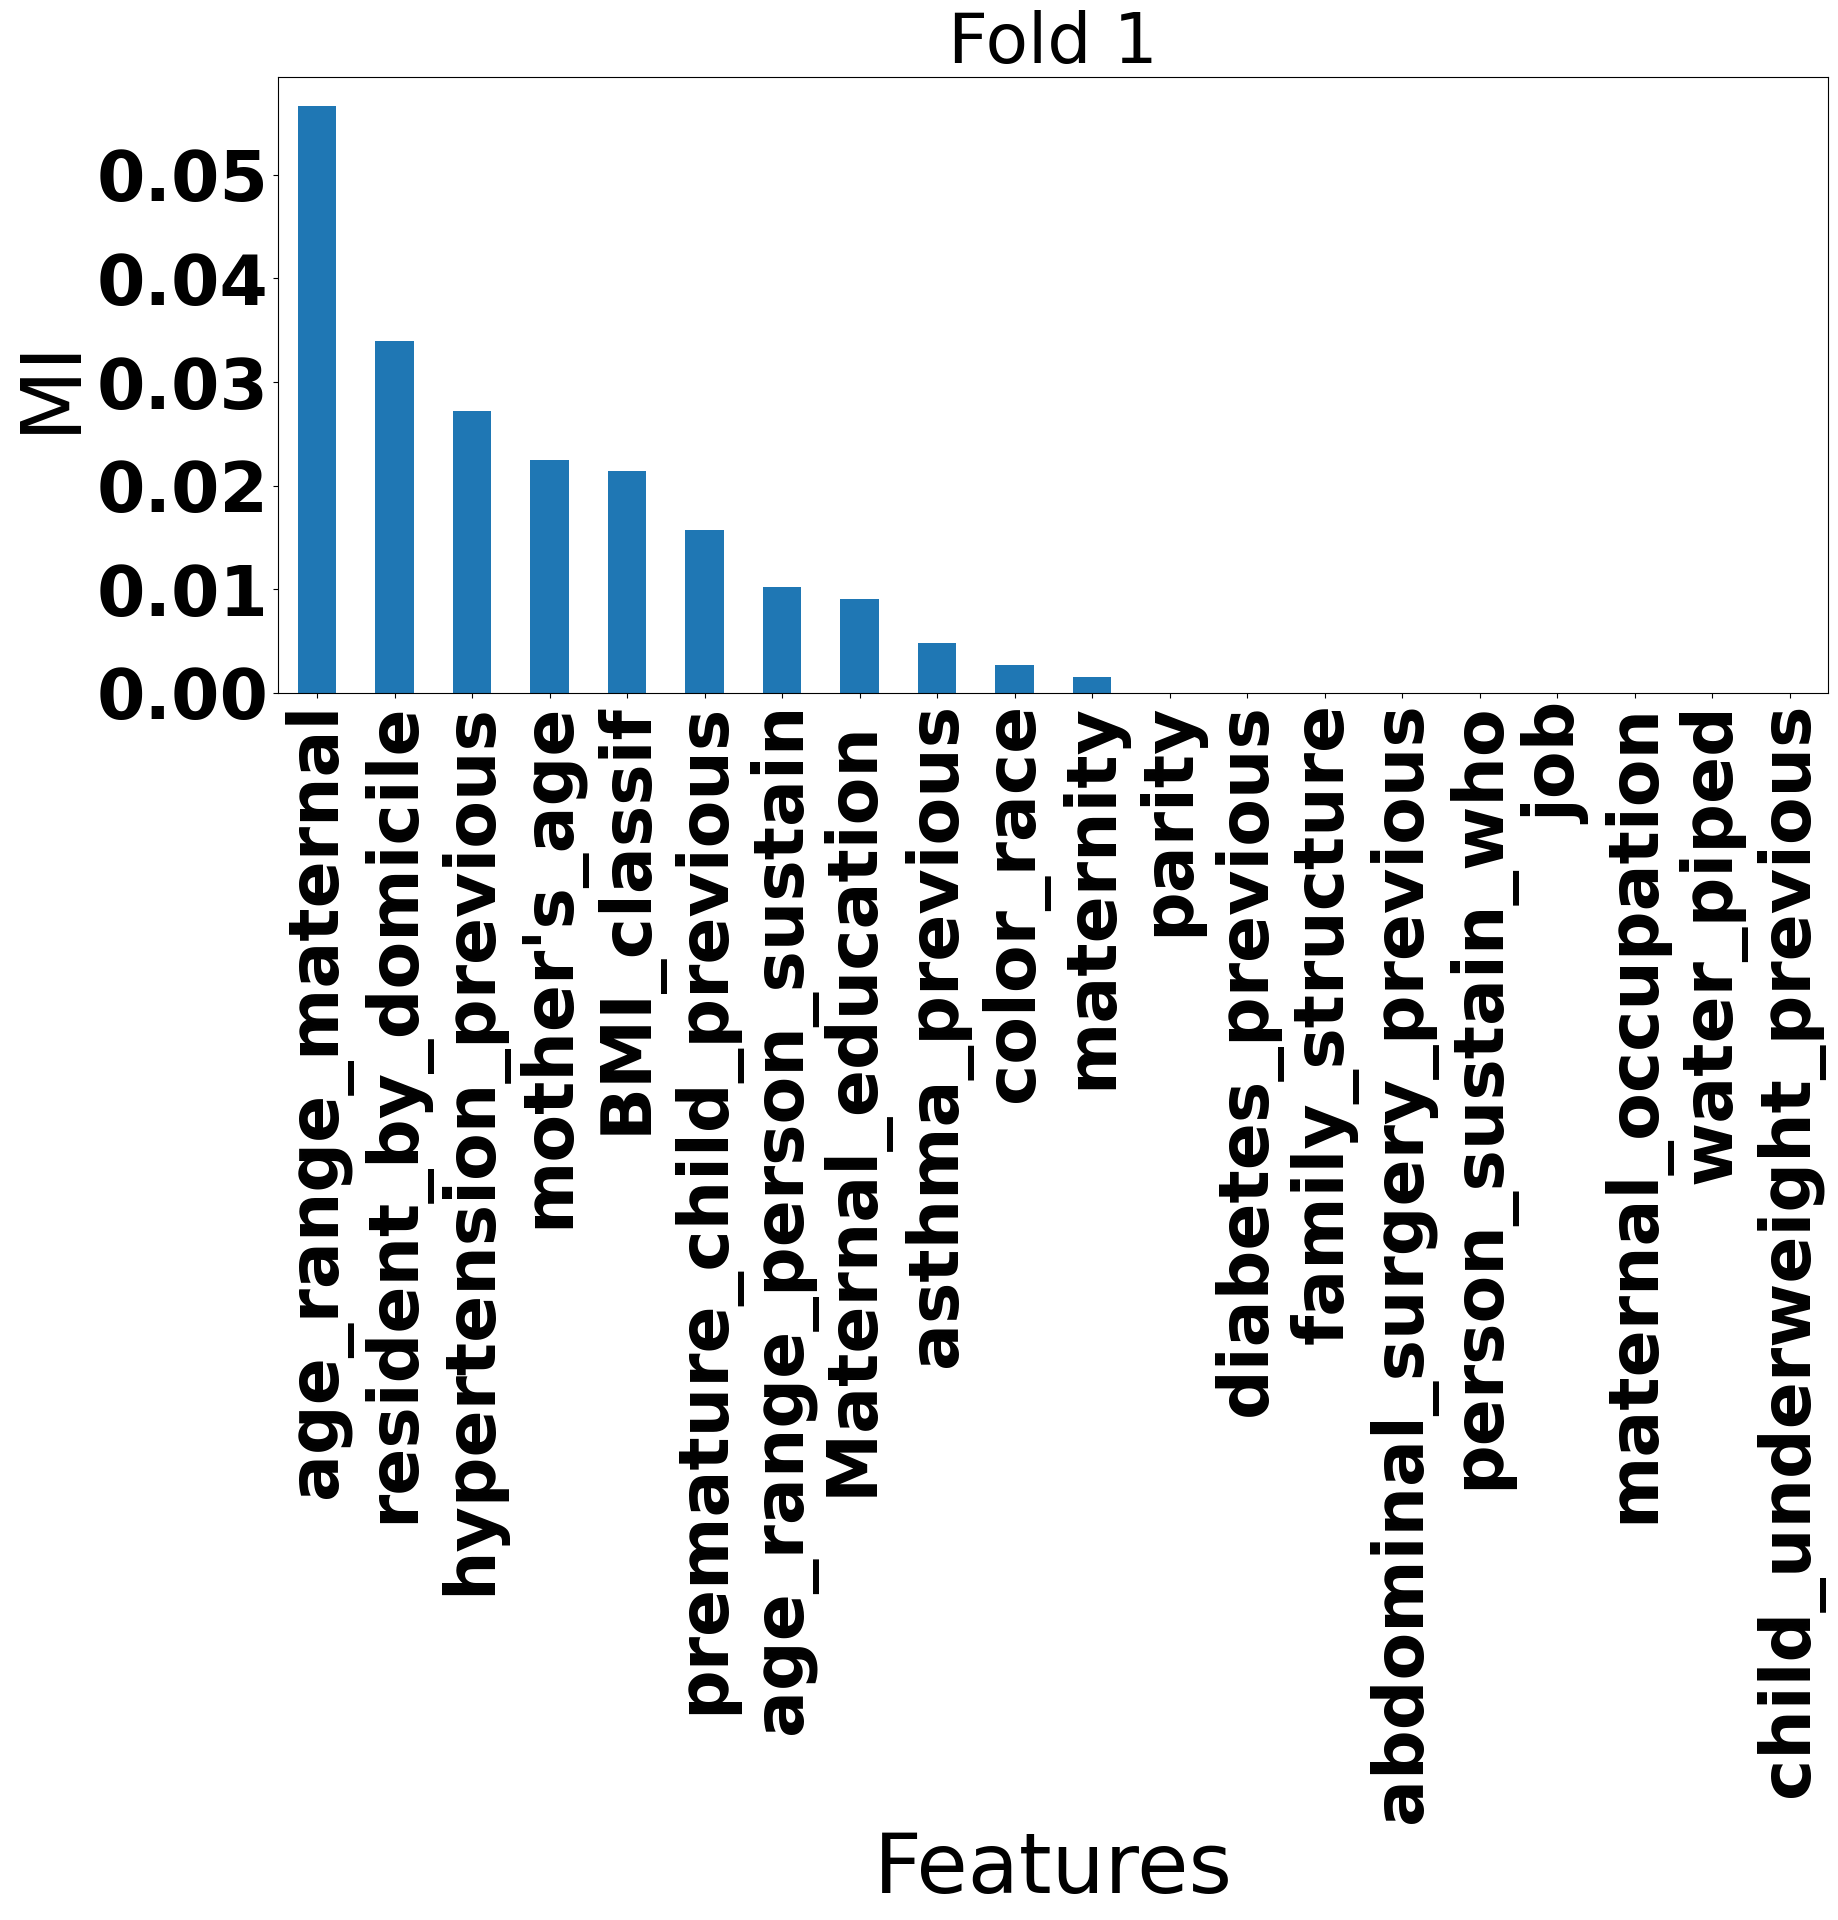

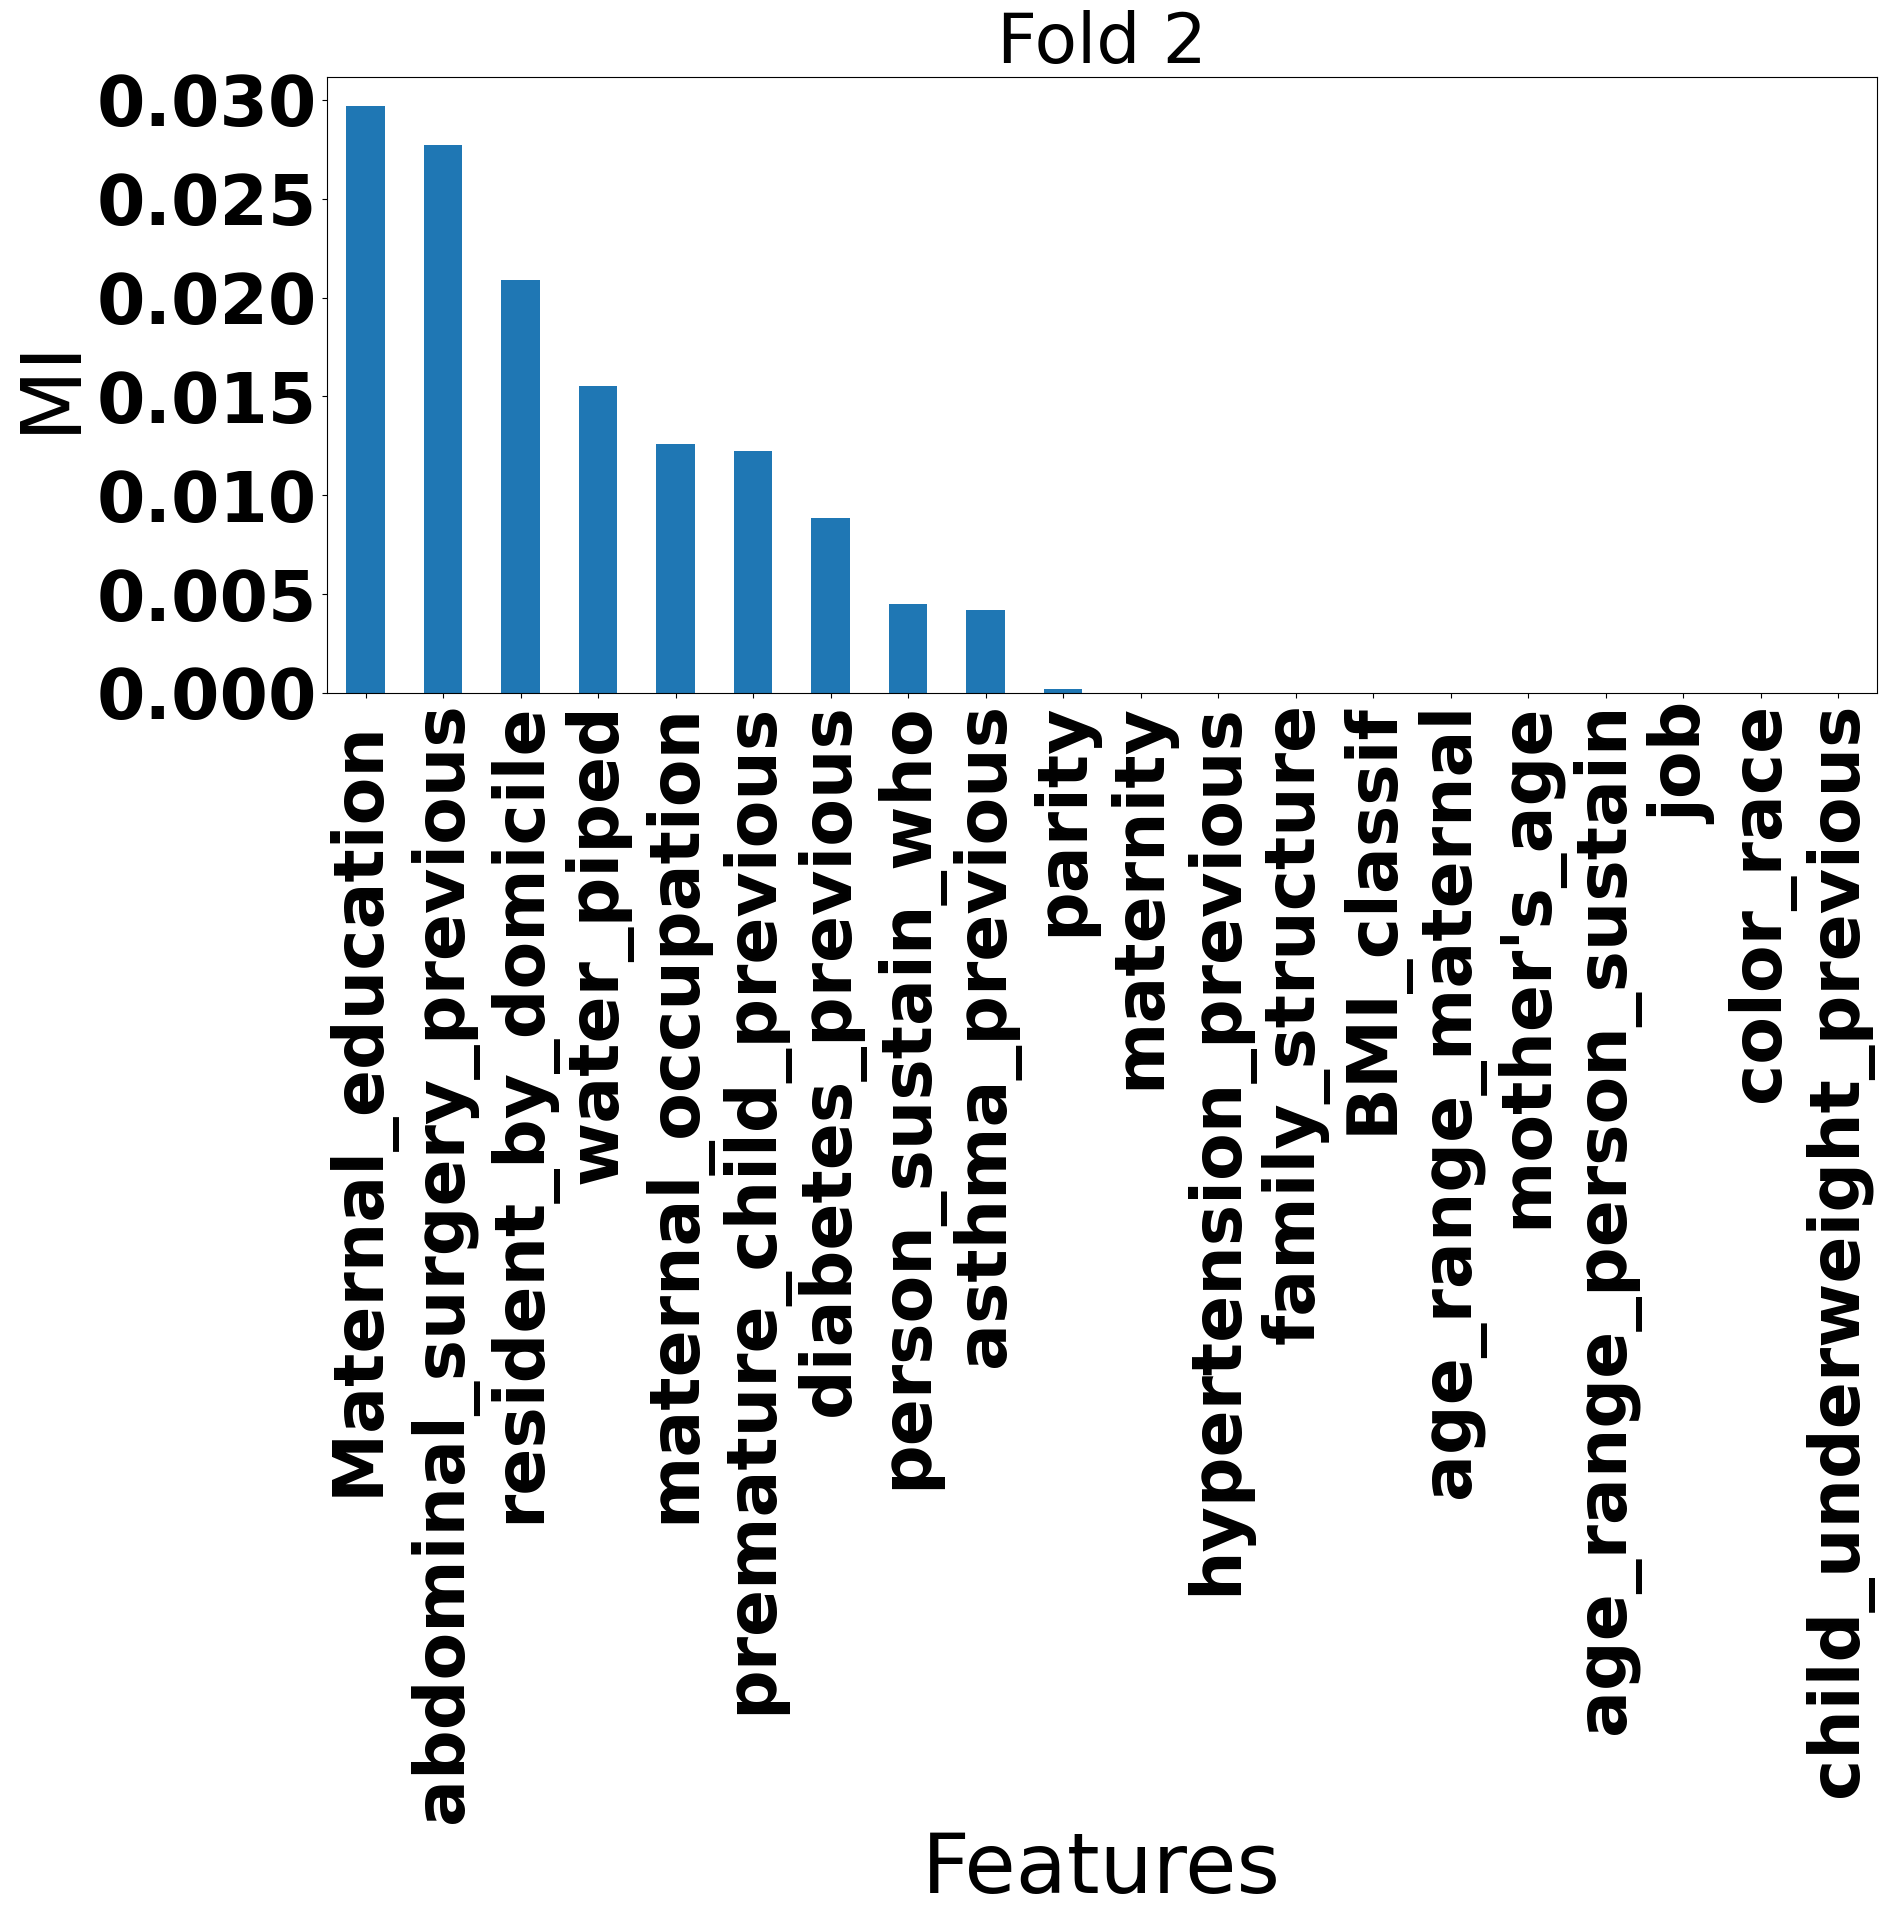

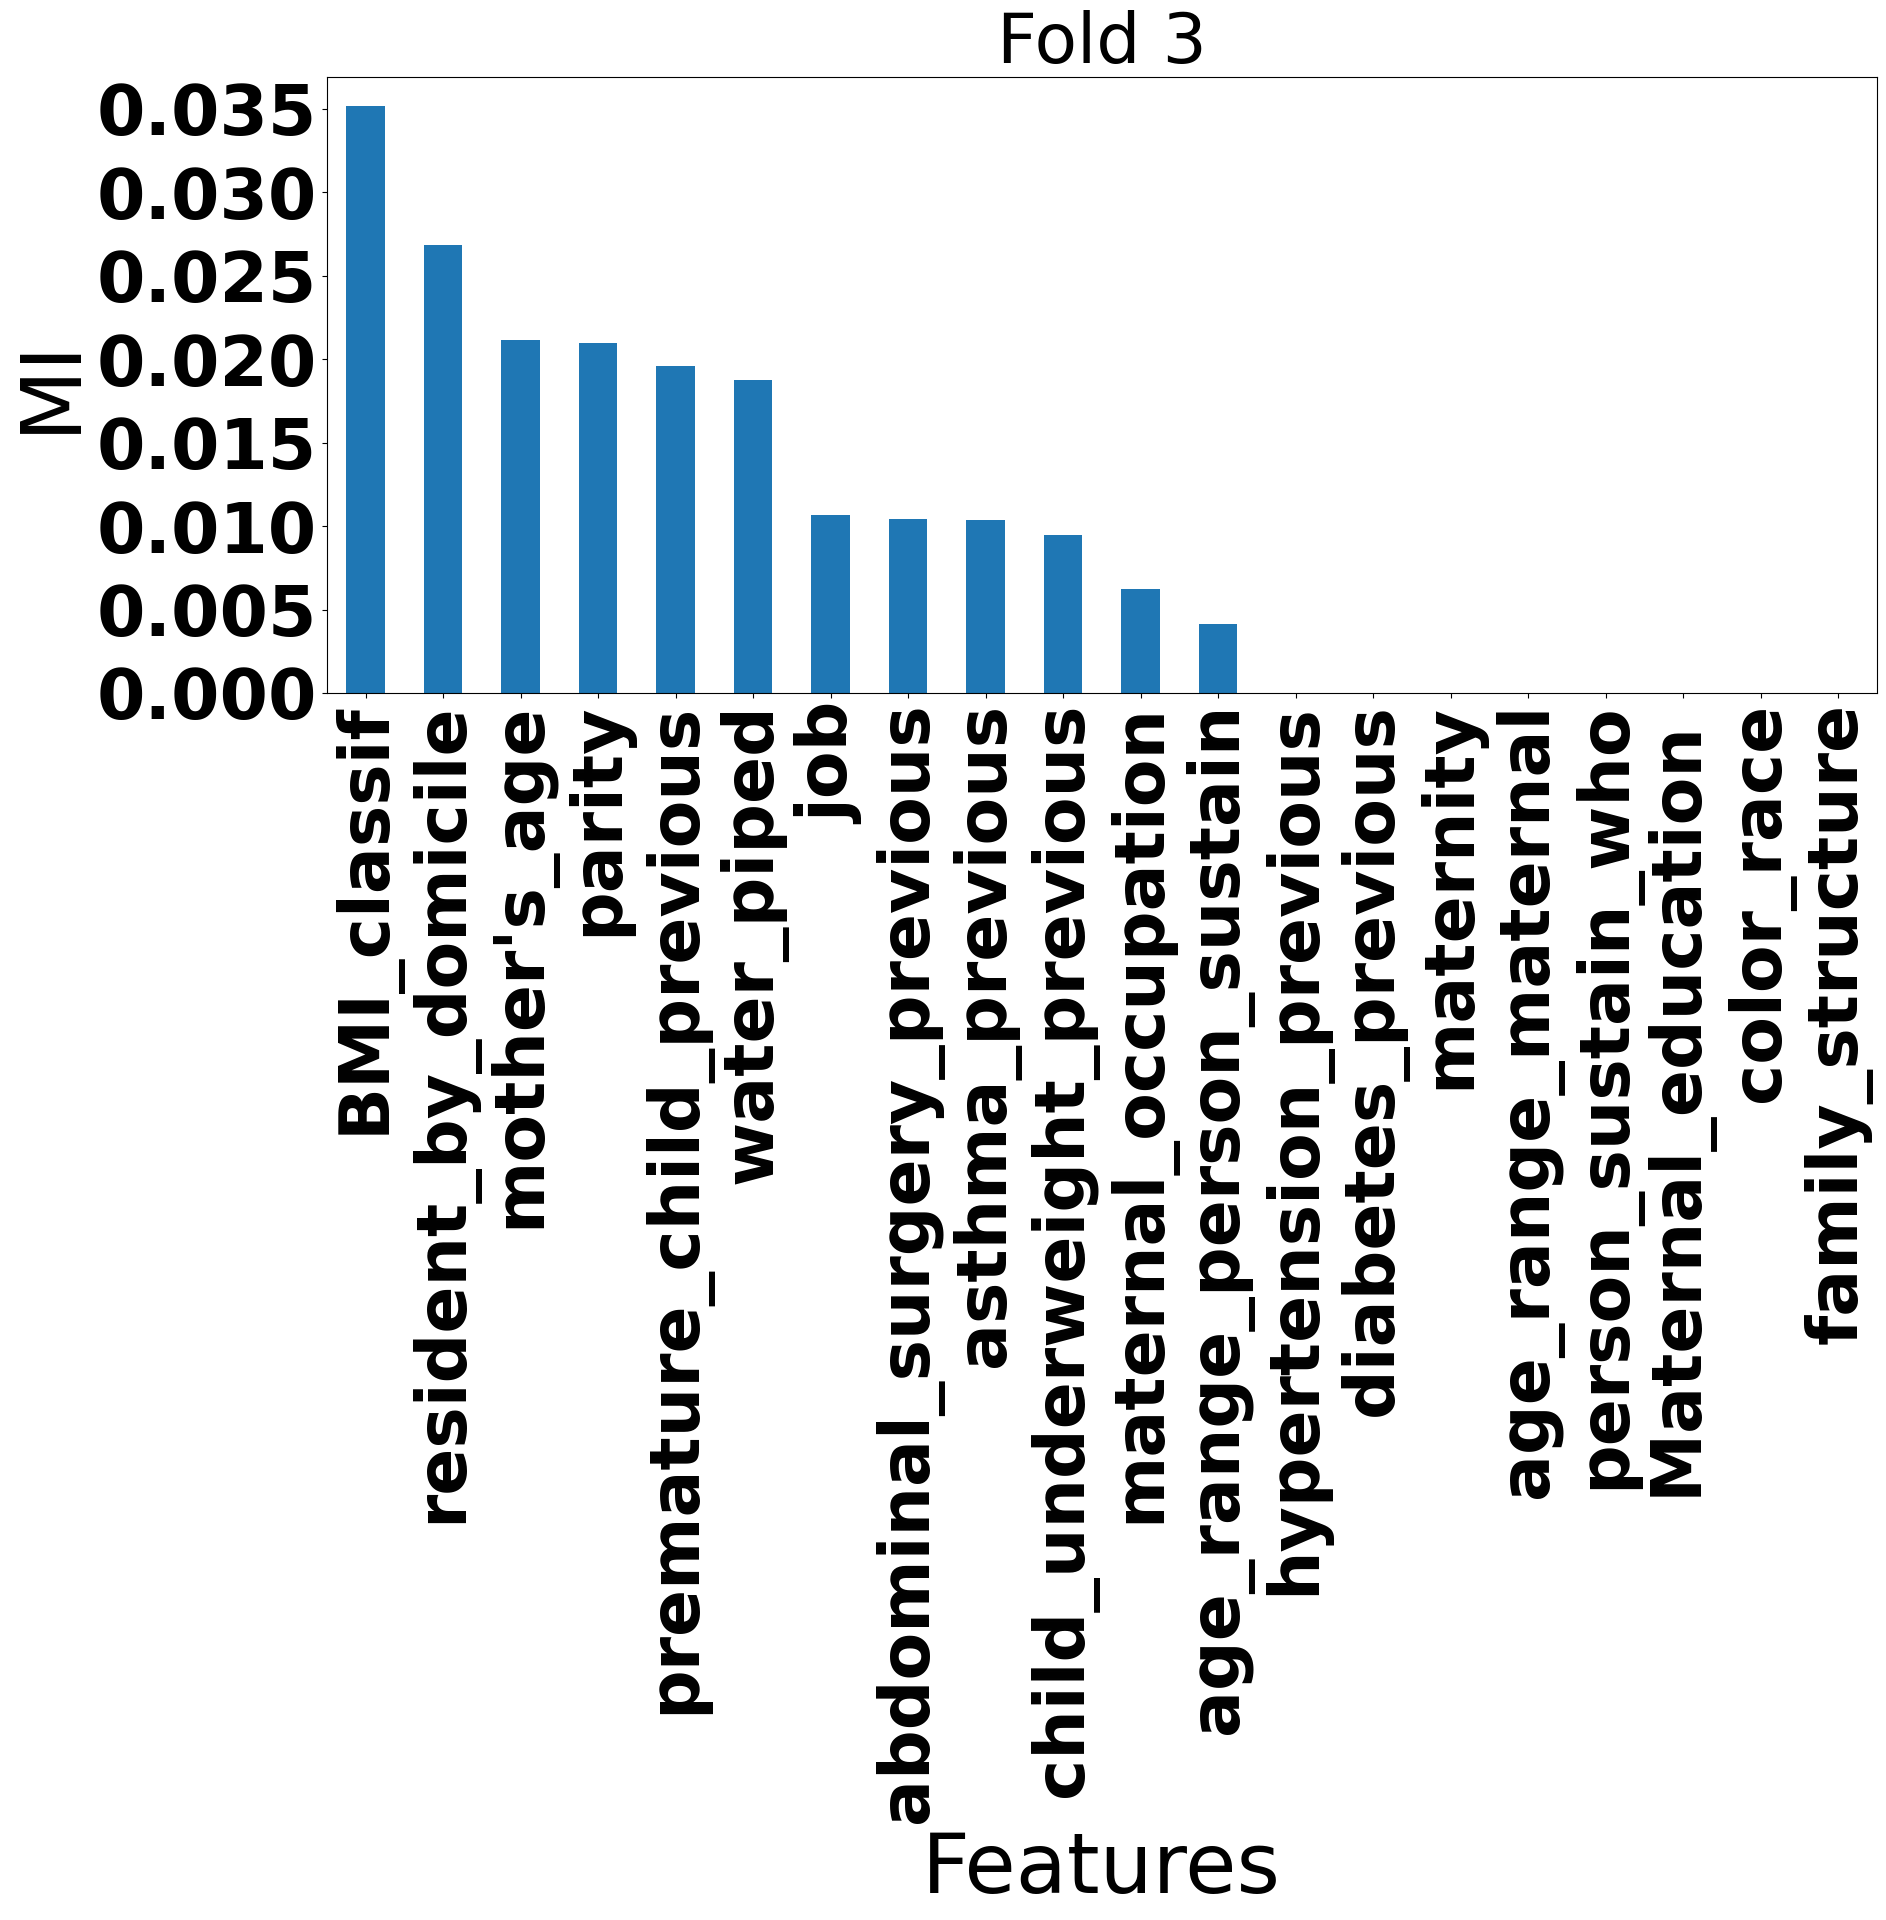

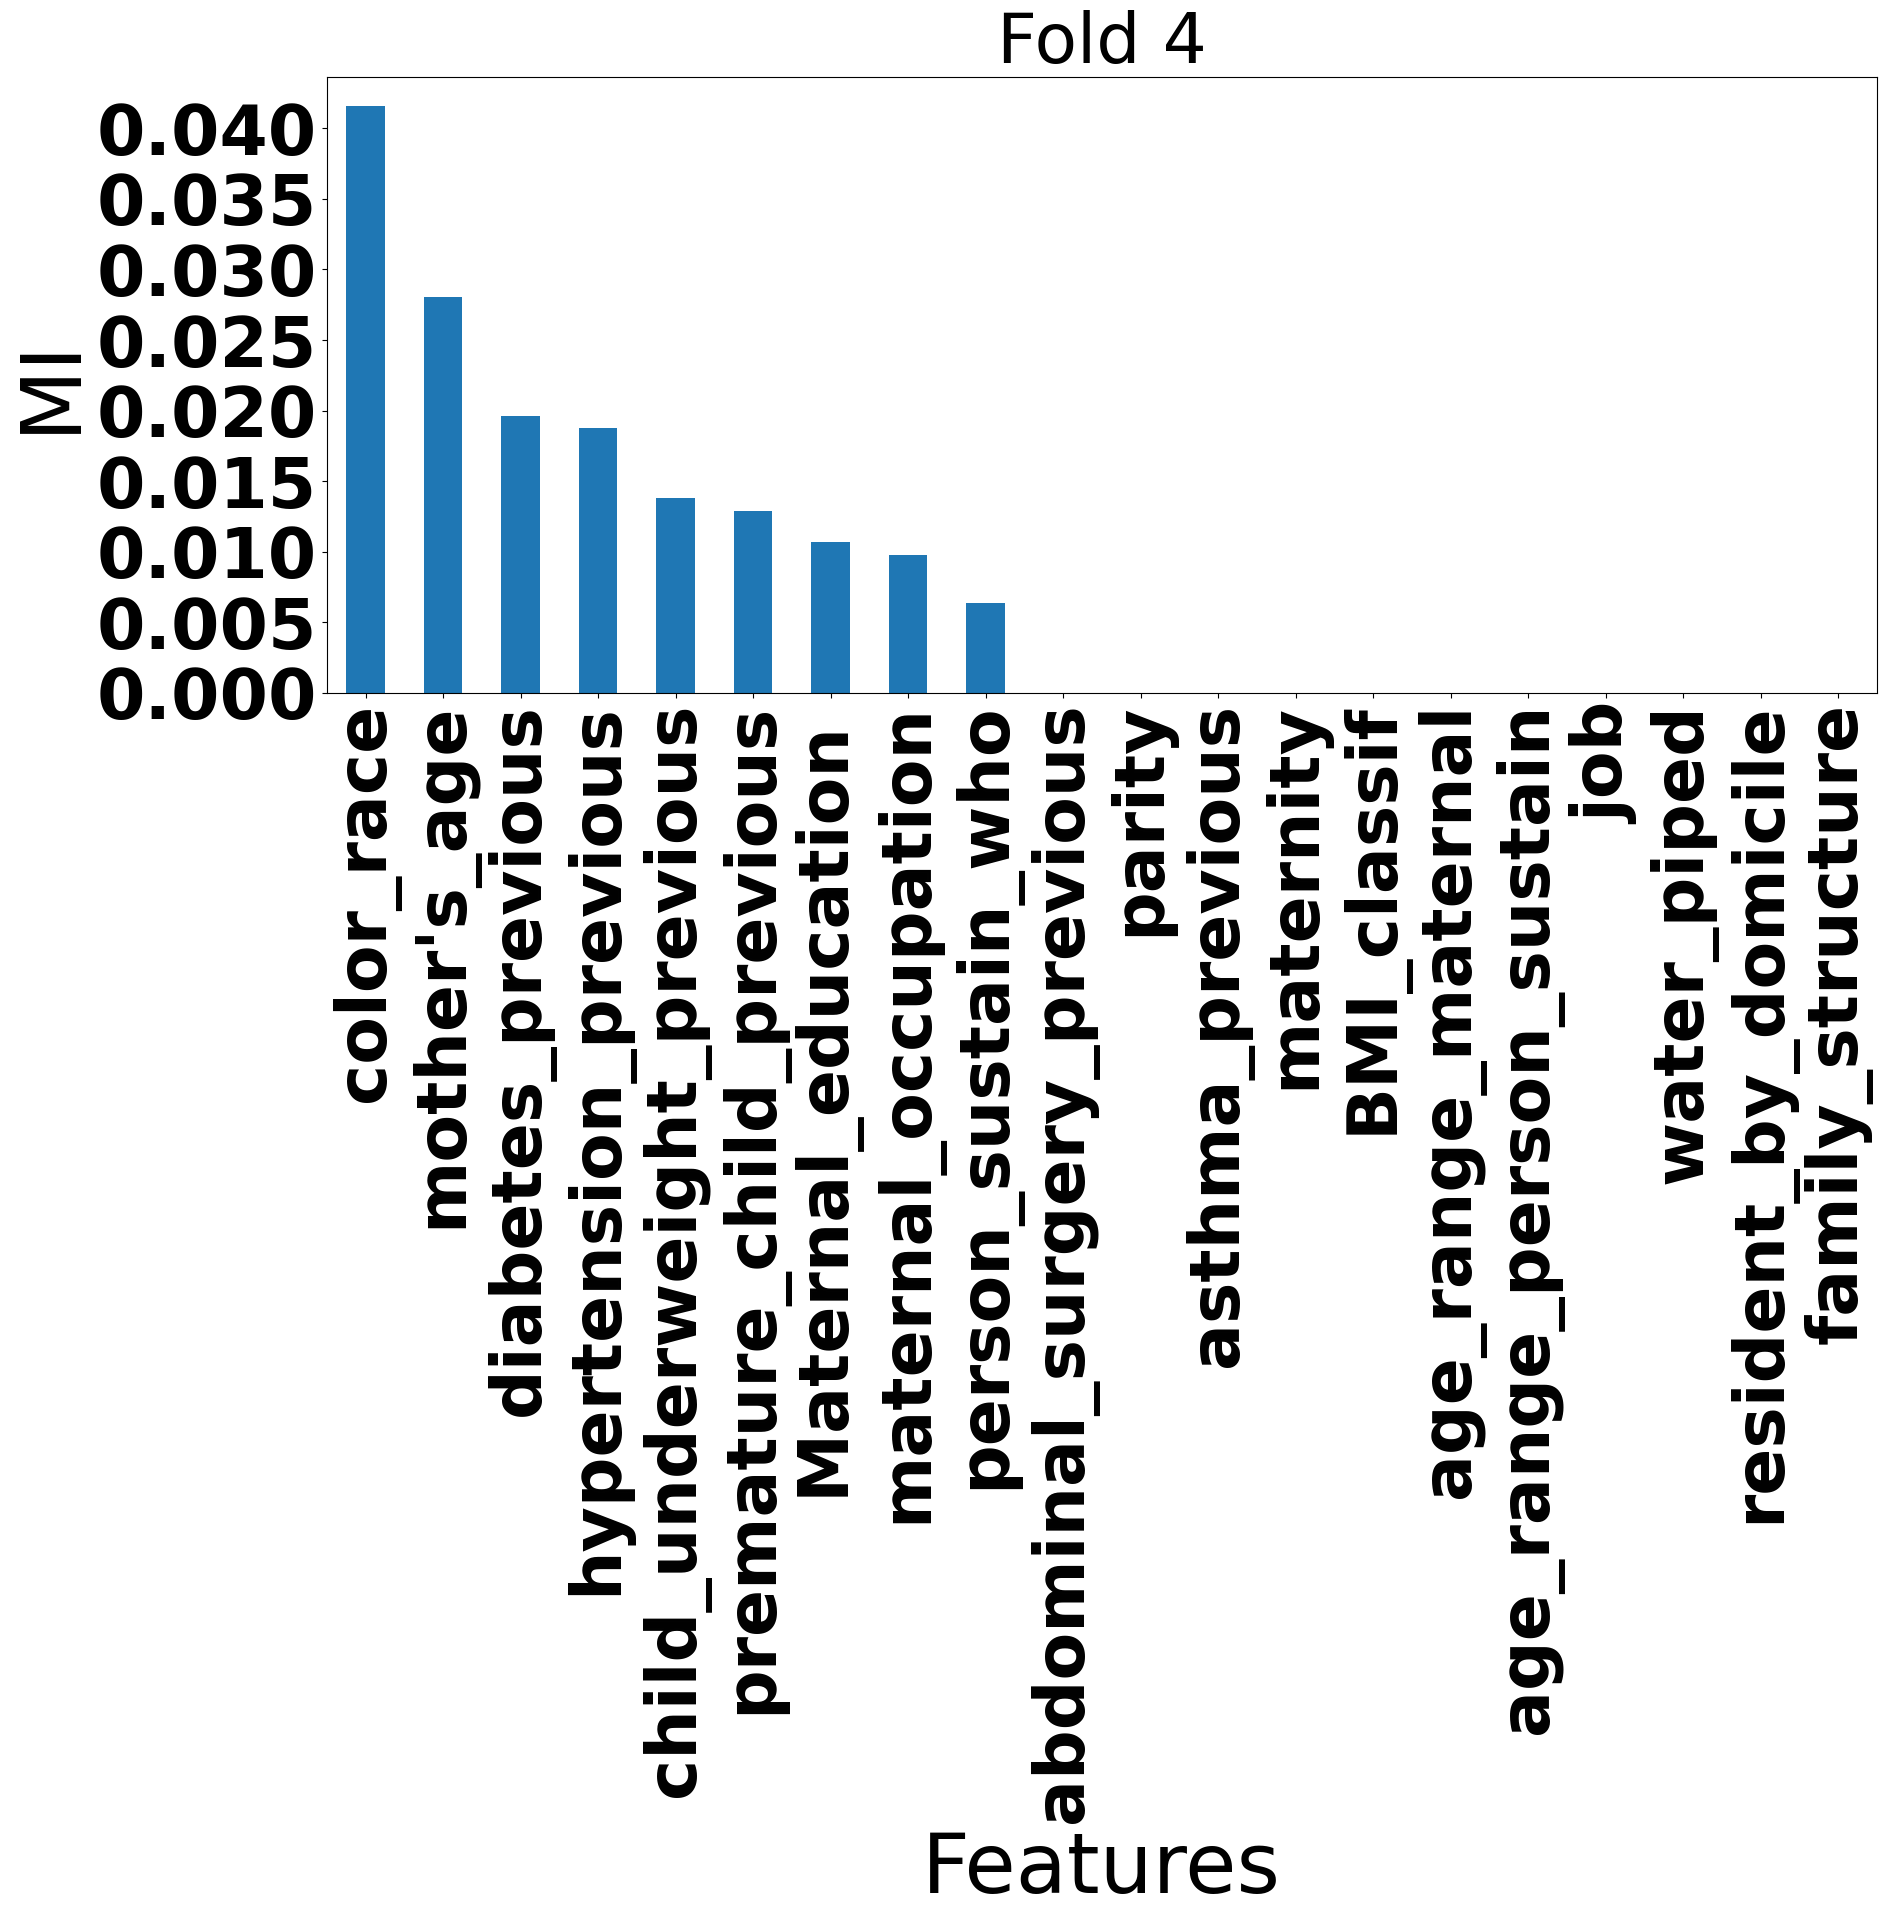

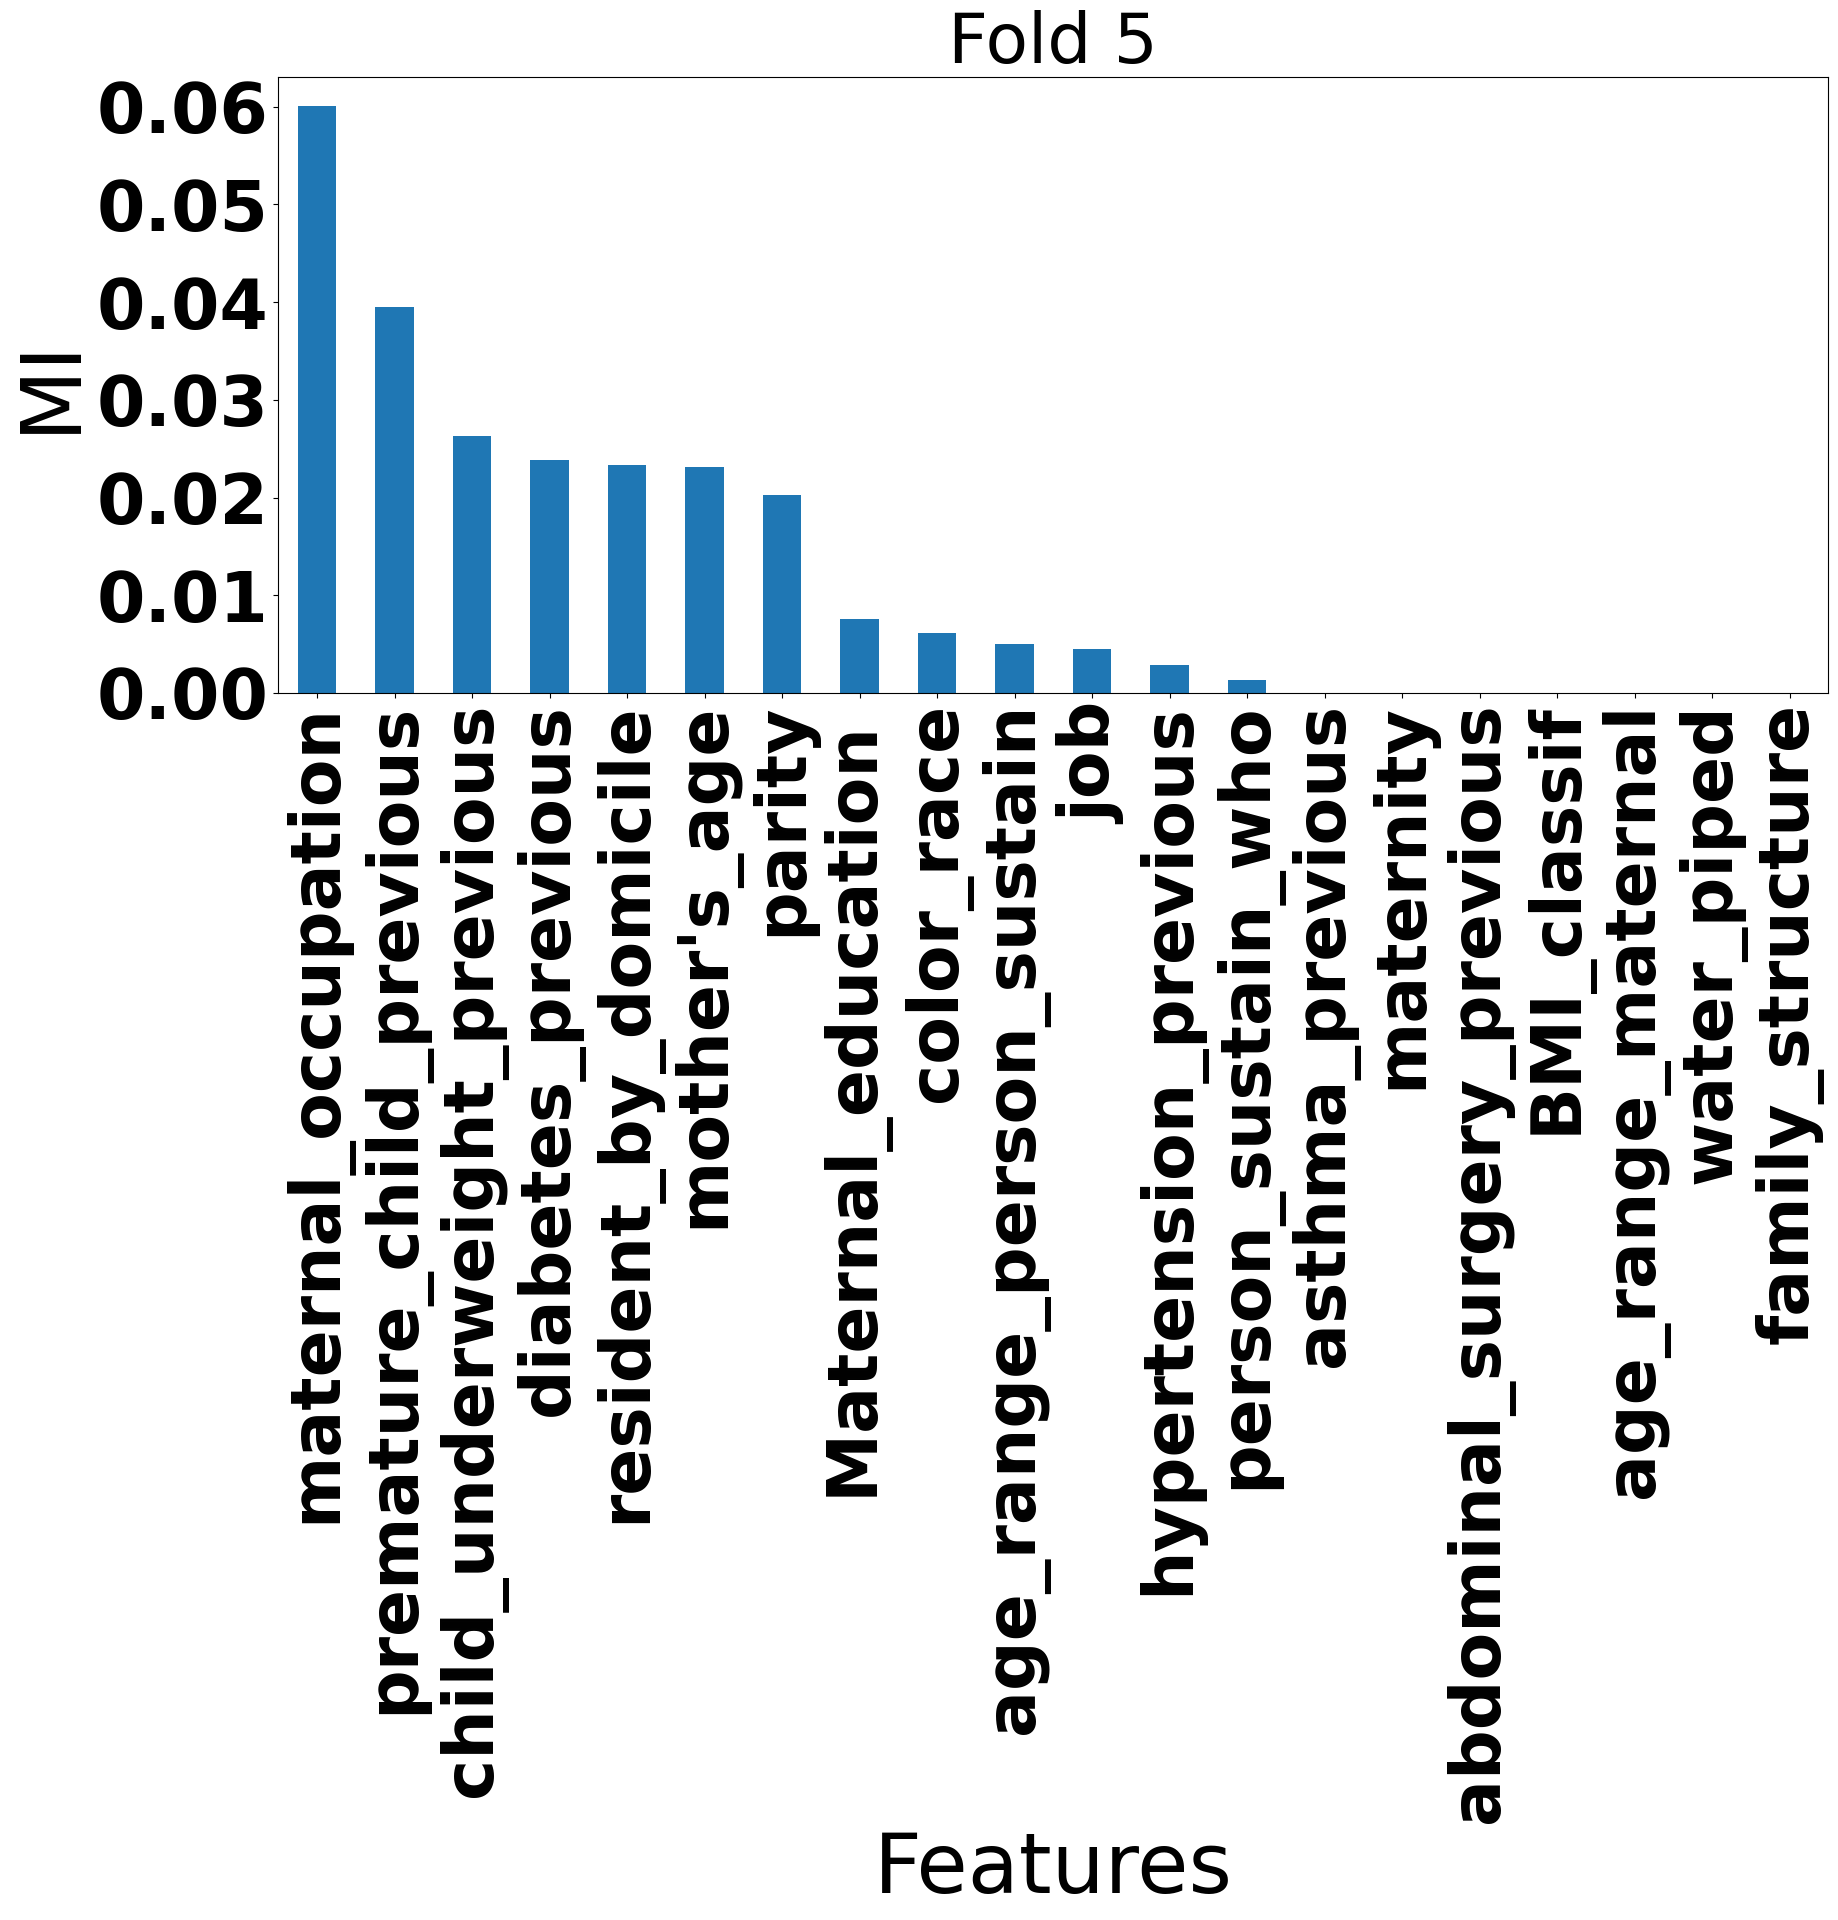

In [33]:
i = 1
dtscores = []
dtprecisions = []
dtrecalls = []
dtf1 = []
dttra = []

kscores = []
kprecisions = []
krecalls = []
kf1 = []
ktra = []

xscores = []
xprecisions = []
xrecalls = []
xf1 = []
xtra = []

nscores = []
nprecisions = []
nrecalls = []
nf1 = []
ntra = []

rscores = []
rprecisions = []
rrecalls = []
rf1 = []
rtra = []

sscores = []
sprecisions = []
srecalls = []
sf1 = []
stra = []

# 5-FOLD SPLIT
kFold=KFold(n_splits=5, random_state = 123, shuffle = True) #random

for train_index,test_index in kFold.split(X):
    # print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)
    
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    #Pearsons Correlation
    corr = X_train.corr()
    corr_features = correlation(X, 0.85) # 85% is a good value of the threshold
#     print(corr_features)
    X_train.drop(columns = corr_features, inplace = True)
    X_test.drop(columns = corr_features, inplace = True)
    
    #Mutual Information
    
    mutual_info = mutual_info_classif(X_train, y_train) #random
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = X_train.columns
    mutual_info.sort_values(ascending = False)
    plt.figure(figsize = (20, 8))
    plt.xticks(fontsize= 50, weight = 'bold')
    plt.yticks(fontsize= 50, weight = 'bold')
    plt.xlabel("Features", fontsize= 60)
    plt.ylabel("MI", fontsize= 60)
    plt.title("Fold " + str(i), fontsize = 50)
    mutual_info[0:20].sort_values(ascending = False).plot.bar();
    plt.savefig("Fold"+str(i)+".pdf", bbox_inches = 'tight')

    #Select top 20 features
    sel_five_cols = SelectKBest(mutual_info_classif, k=20)
    sel_five_cols.fit(X_train, y_train)
    
#     print(X_train.columns[sel_five_cols.get_support()])
    # X_test.columns[sel_five_cols.get_support()]
    # X_train = sel_five_cols.transform(X_train)
    # X_test = sel_five_cols.transform(X_test)
    
    cols_idxs = sel_five_cols.get_support(indices=True)
    X_train = X_train.iloc[:,cols_idxs]
    X_test = X_test.iloc[:,cols_idxs]

#     Decision Tree Train Tune and Test
    dt =DecisionTreeClassifier()
    rf_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=random_grid_dt,n_iter=10,cv=3,verbose=1,
                               random_state = 323,n_jobs=-1)#random
    rf_randomcv.fit(X_train,y_train)
    best_random_grid=rf_randomcv.best_estimator_
    y_pred=best_random_grid.predict(X_test)
    y_train_pred = best_random_grid.predict(X_train)
    s, precision, recall, f, train = metrics(y_test, y_pred, y_train_pred, y_train)
#     Metrics
    dtscores.append(s)
    dtprecisions.append(precision)
    dtrecalls.append(recall)
    dtf1.append(f)
    dttra.append(train)
 # KNN  Train Tune and Test
    knn_clf =KNeighborsClassifier(n_neighbors = 5)
    knn_clf.fit(X_train, y_train)
    y_pred= knn_clf.predict(X_test)
    y_train_pred = knn_clf.predict(X_train)
    s, precision, recall, f, train = metrics(y_test, y_pred, y_train_pred, y_train)
    
#   Metrics
    kscores.append(s)
    kprecisions.append(precision)
    krecalls.append(recall)
    kf1.append(f)
    ktra.append(train)

#   Naive Bayes  Train Tune and Test
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    y_train_pred = gnb.predict(X_train)
    s, precision, recall, f, train = metrics(y_test, y_pred, y_train_pred, y_train)
    
#   Metrics
    nscores.append(s)
    nprecisions.append(precision)
    nrecalls.append(recall)
    nf1.append(f)
    ntra.append(train)

    #   SVM Train Tune and Test
    sv=SVC()
    rf_randomcv=RandomizedSearchCV(estimator=sv,param_distributions=random_grid_s,n_iter=10,cv=3,verbose=1,
                              random_state = 789,n_jobs=-1)#random
    rf_randomcv.fit(X_train,y_train)
    best_random_grid = rf_randomcv.best_estimator_
    y_pred=best_random_grid.predict(X_test)
    y_train_pred = best_random_grid.predict(X_train)
    s, precision, recall, f, train = metrics(y_test, y_pred, y_train_pred, y_train)
#   Metrics
    sscores.append(s)
    sprecisions.append(precision)
    srecalls.append(recall)
    sf1.append(f)
    stra.append(train)

#   Random Forest Train Tune and Test
    rf=RandomForestClassifier()
    rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid_rf,n_iter=10,cv=3,verbose=1,
                              random_state = 789,n_jobs=-1)#random
    rf_randomcv.fit(X_train,y_train)
    best_random_grid = rf_randomcv.best_estimator_
    y_pred=best_random_grid.predict(X_test)
    y_train_pred = best_random_grid.predict(X_train)
    s, precision, recall, f, train = metrics(y_test, y_pred, y_train_pred, y_train)
#   Metrics
    rscores.append(s)
    rprecisions.append(precision)
    rrecalls.append(recall)
    rf1.append(f)
    rtra.append(train)

#   XGBoost Train Tune and Test
    le = LabelEncoder()
    y_train_en = le.fit_transform(y_train)
    y_test_en = le.transform(y_test)
    xgb = XGBClassifier()
    rf_randomcv=RandomizedSearchCV(estimator=xgb,param_distributions = XGboost_params,n_iter=10,cv = 3,random_state = 999,n_jobs=-1,verbose=1)#random
    rf_randomcv.fit(X_train,y_train_en)
    best_random_grid=rf_randomcv.best_estimator_
    y_pred= best_random_grid.predict(X_test)
    y_train_pred = best_random_grid.predict(X_train)
    s, precision, recall, f, train = metrics(y_test_en, y_pred, y_train_pred, y_train_en)

    if i == 4:
        xg_X_train = X_train
        xg_y_train = y_train_en
        xg_y_test = y_test_en
        xg_X_test = X_test
        xg_boost = best_random_grid

#   Metrics
    xscores.append(s)
    xprecisions.append(precision)
    xrecalls.append(recall)
    xf1.append(f)
    xtra.append(train)
    i+=1

print("Decision Tree")
print()
print_fold(dtscores)
print_statement(dtscores, dtprecisions, dtrecalls, dtf1, dttra)
print()
print("k-NN")
print()
print_fold(kscores)
print_statement(kscores, kprecisions, krecalls, kf1, ktra)
print()
print("Naive Bayes")
print()
print_fold(nscores)
print_statement(nscores, nprecisions, nrecalls, nf1, ntra)
print()
print("SVM")
print()
print_fold(sscores)
print_statement(sscores, sprecisions, srecalls, sf1, stra)
print()
print("Random Forest")
print()
print_fold(rscores)
print_statement(rscores, rprecisions, rrecalls, rf1, rtra)
print()
print("XGBoost")
print()
print_fold(xscores)
print_statement(xscores, xprecisions, xrecalls, xf1, xtra)
#     knn.fit(X_train, y_train)
    

In [34]:
xg_X_train 
xg_y_train 
xg_y_test 
xg_X_test
xg_boost 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

Model Explanations Using SHAP

In [35]:
y_pred= xg_boost.predict(xg_X_test)
y_train_pred = xg_boost.predict(xg_X_train)
s, precision, recall, f, train = metrics(xg_y_test, y_pred, y_train_pred, xg_y_train)
print(s)
print(train)

0.7122302158273381
0.6535008976660682


In [36]:
explainer = shap.Explainer(xg_boost)
shap_values = explainer(xg_X_test)

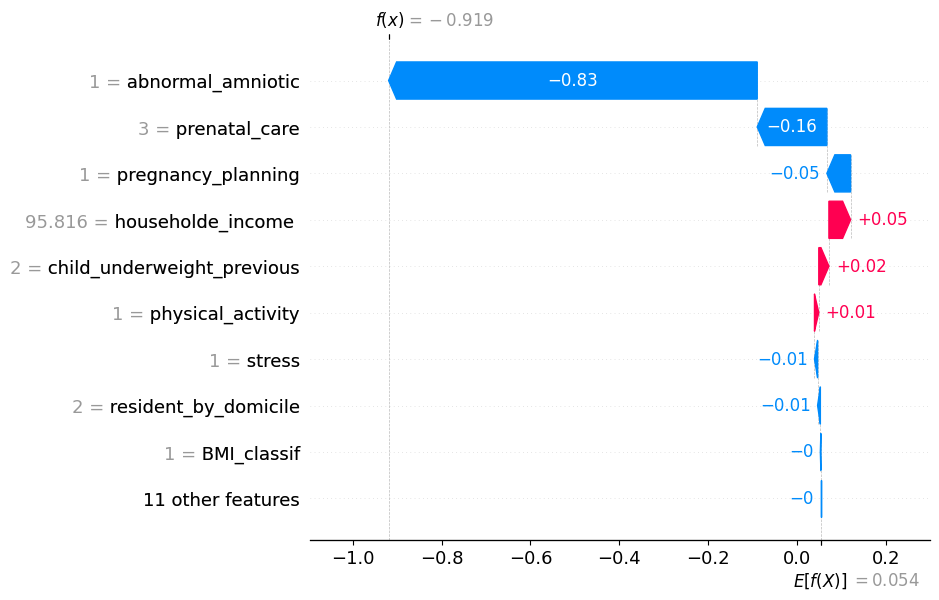

In [37]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1], show = False)
plt.savefig("waterfall_premature.pdf", bbox_inches = 'tight')
plt.show()

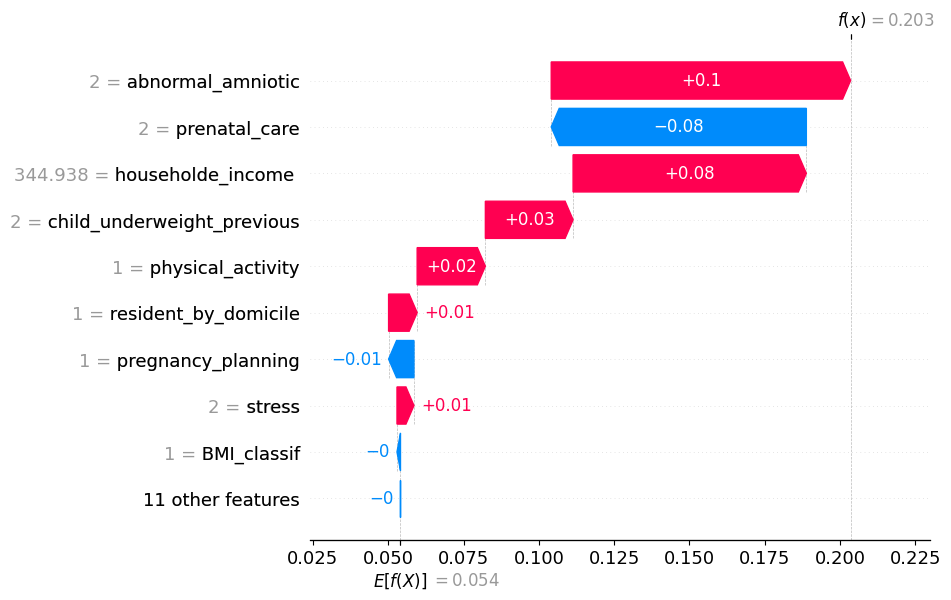

In [38]:
shap.plots.waterfall(shap_values[7], show = False)
plt.savefig("waterfall_normal.pdf", bbox_inches = 'tight')
plt.show()

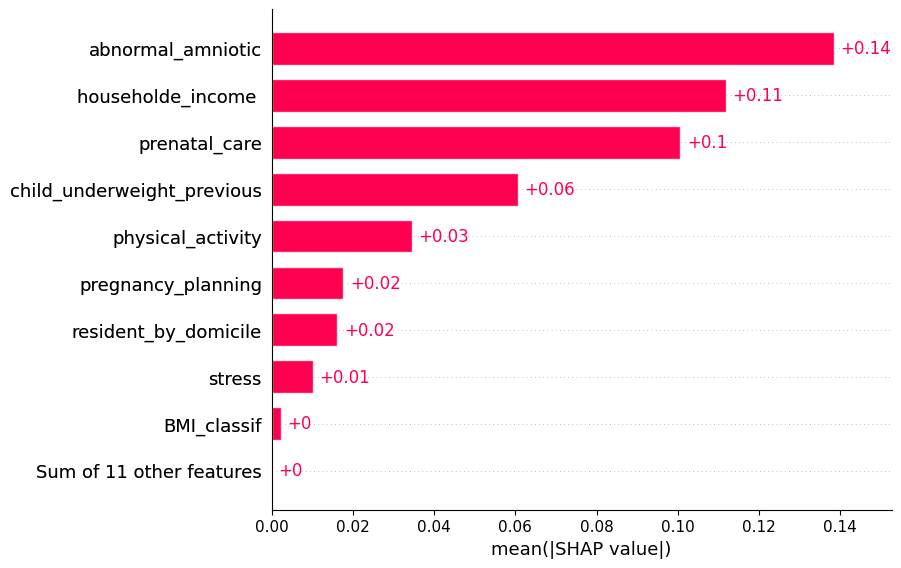

In [39]:
shap.plots.bar(shap_values, show = False)
plt.savefig("postive.pdf", bbox_inches = 'tight')
plt.show()